In [1]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

### Single variable ODE

Let's consider
$$
\frac{dy}{dt}=t-y;\quad y(0)=1;
$$
which has a an solution
$$
y=t-1+2e^{-t}
$$

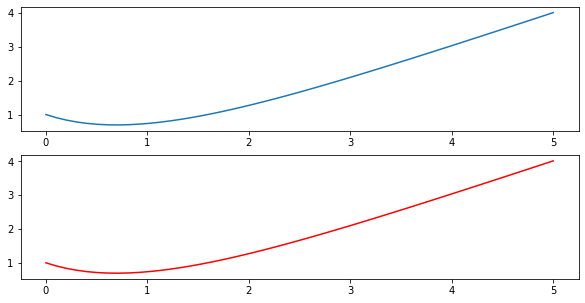

In [2]:
# Define a function which returns the derivative
def dy_dt(y, t):
    return t - y

h,tmax = 0.1, 5.0

ts = np.linspace(0,tmax,int(tmax/h)) #We are integrating between 0 and 5 seconds. 
#This creates the discretization on time

y0 = 1.0  # the initial condition

# the odeint function
ys = odeint(dy_dt, y0, ts)
# odeint( function of the right side of dy/dt, initial value, time vector )

ys = np.array(ys).flatten() #This is the numerical solution

y_exact = ts - 1 + 2*np.exp(-ts) #This is the exact solution

fig, ax = plt.subplots(2, figsize = (10,5))
ax[0].plot(ts, ys)
ax[1].plot(ts, y_exact, c = 'r')
plt.show()

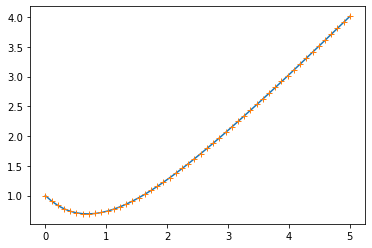

In [3]:
#Alternatively you can use solve_ivp function which 
#allows you to access specific integration schemes.

#Notice the difference in the definition of the 
#function compared to the odeint. t and y are swapped
def dy_dt(t, y):
    return t - y

h,tmax=.1,5.
ts = np.linspace(0,tmax,int(tmax/h)) #We are integrating between 0 and 5 seconds. 
#This creates the discretization on time

#See https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp 
#for options in ivp_solve
#Unlike odeint, here you need to provide dy_dt, [0, tmax], [y0]
#at least and in that order. If you skip t_eval, it will 
#calculate the solution at automatically determined time points. 
#You can skip method but use it to specify the algorithm used for integration
sol = solve_ivp(dy_dt, [0, tmax], [y0], t_eval=ts, method='RK23')
#sol.y contains the solution (y)
ys = np.array(sol.y).flatten() #This is the numerical solution
#sol.t contains the times at which the solution has been calculated (t). 
#If you skip t_eval, this would be useful
ts=sol.t
y_exact = ts - 1 + 2*np.exp(-ts) #This is the exact solution
plt.plot(ts, ys, ts, y_exact, "+");

### Second order ODE

Let's consider 
$$
m\ddot{y}+ky=\cos(\omega t);\quad y(0)=\dot{y}(0)=0
$$
Convert to two first order ODEs using the substitution:
$$
z=\dot{y}
$$
such that we have:
$$
\dot{y}=z;\quad y(0)=0\\
\dot{z}=(1/m)\cos(\omega t)-(k/m)y;\quad z(0)=0
$$

The above is an equation of motion of a forced spring mass system. The interesting thing about the above is that if you only analyze the unforced equation:
$$
m\ddot{y}+ky=0
$$
You will find that this system has a resonant frequency at $\omega_0=\sqrt(k/m)$. We have learned in this class that if the forcing term on the RHS $\cos(\omega t)$ also has a frequency close to the resonant frequency of the system then the system will show increasing vibrations. We can test this hypothesis in this problem!

In [5]:
def osc(U, t, k, m , omega):
    y, z = U
    return [z, (1/m)*np.cos(omega*t) - (k/m)*y]

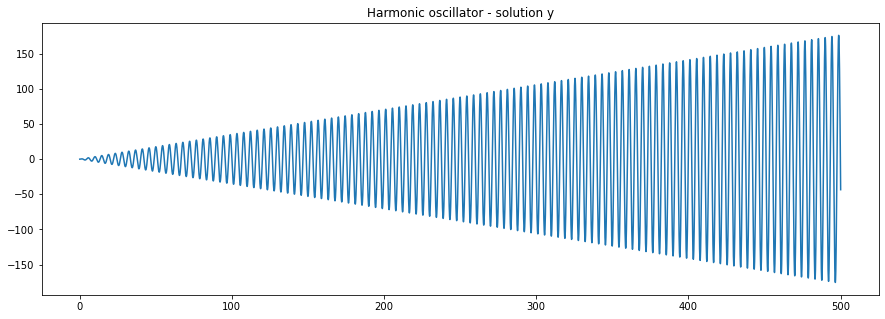

In [28]:
m = 1; k = 2
omega0 = (k/m)**(1/2) # This is the natural frequency of the system
y0 = 0; z0 = 0
U0 = [y0, z0]

t = np.linspace(0, 500, 10000)
Us = odeint(osc, U0, t, args = tuple([k,m,omega0]))

plt.figure(figsize = (15,5))
plt.plot(t, Us[:,0])
plt.title("Harmonic oscillator - solution y")
plt.show()
# plt.plot(t, Us[:,1])
# plt.title("solution of z")
# plt.show()

- If you have a spring-mass system, and you force them in frequency w equal to natural frequency w0, the vibration amplitude will go very high : resonance
- If different from w0, it is not going to skyrocket like that

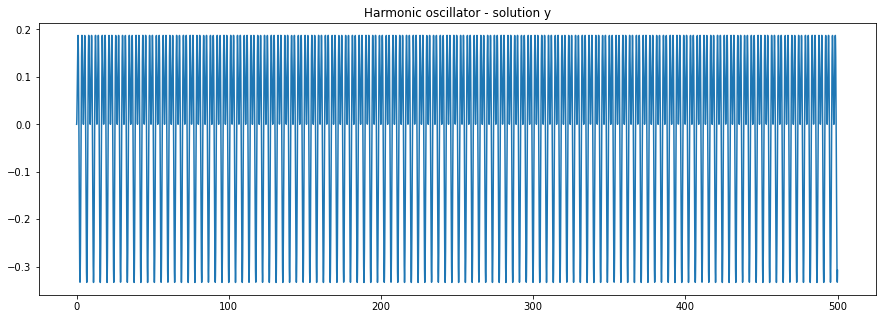

In [27]:
m = 1; k = 2
omega0 = 2 * (k/m)**(1/2)
y0 = 0; z0 = 0
U0 = [y0, z0]

t = np.linspace(0, 500, 10000)
Us = odeint(osc, U0, t, args = tuple([k,m,omega0]))

plt.figure(figsize = (15,5))
plt.plot(t, Us[:,0])
plt.title("Harmonic oscillator - solution y")
plt.show()

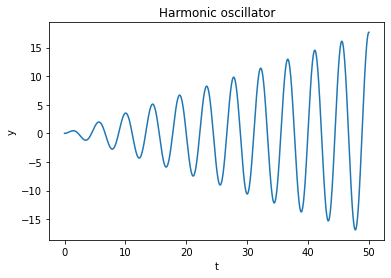

In [4]:
def dU_dt(U, t):
    # Here U is a vector such that y=U[0] and z=U[1]. 
    #This function should return [dy/dt, dz/dt]
    y,z=U[0],U[1]
    F=np.empty(2)
    
    #Assuming
    m,k=1.,2.
    #Note that the resonant frequency is
    omega_0=np.sqrt(k/m)
    
    #This is the frequency of the forcing term on the RHS. 
    #If you bring this close to omega_0, 
    #you should see the system getting destabilized.
    omega=omega_0
    
    F[0]=z
    F[1]= -(k/m)*y + (1/m)*np.cos(omega*t)
    return F

U0 = [0, 0]
h,tmax=.01,50.
ts = np.linspace(0,tmax,int(tmax/h)) 
Us = odeint(dU_dt, U0, ts)
#The first column has the solution for y. 
#The second column for z=dy/dt. This is according to U above
ys = Us[:,0]
plt.xlabel("t")
plt.ylabel("y")
plt.title("Harmonic oscillator")
plt.plot(ts,ys);